In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('/kaggle/input/cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv')
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [6]:
df_arbaiza = df[['Frequent Cold','Dry Cough','Snoring','Level']]
df_arbaiza

,Frequent Cold,Dry Cough,Snoring,Level
0,2,3,4,Low
1,1,7,2,Medium
2,6,7,2,High
3,6,7,5,High
4,4,2,3,High
...,...,...,...,...
995,4,5,3,High
996,3,1,4,High
997,6,7,2,High
998,4,2,3,High


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#Check the first few rows of the data:
print(df_arbaiza.head())

   Frequent Cold  Dry Cough  Snoring   Level
0              2          3        4     Low
1              1          7        2  Medium
2              6          7        2    High
3              6          7        5    High
4              4          2        3    High


In [10]:
# Get the summary statistics of the data:
print(df_arbaiza.describe())

       Frequent Cold    Dry Cough      Snoring
count    1000.000000  1000.000000  1000.000000
mean        3.536000     3.853000     2.926000
std         1.832502     2.039007     1.474686
min         1.000000     1.000000     1.000000
25%         2.000000     2.000000     2.000000
50%         3.000000     4.000000     3.000000
75%         5.000000     6.000000     4.000000
max         7.000000     7.000000     7.000000


In [11]:
# Check for missing values:
print(df_arbaiza.isnull().sum())

Frequent Cold    0
Dry Cough        0
Snoring          0
Level            0
dtype: int64


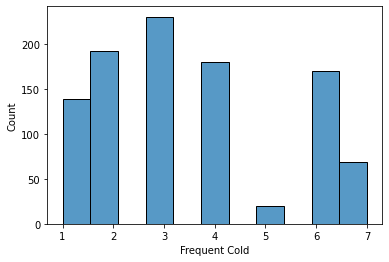

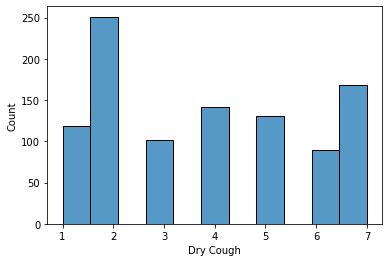

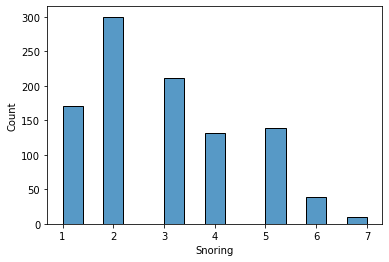

In [12]:
# Check the data distribution for each predictor variable:

sns.histplot(df_arbaiza['Frequent Cold'], kde=False)
plt.show()

sns.histplot(df_arbaiza['Dry Cough'], kde=False)
plt.show()

sns.histplot(df_arbaiza['Snoring'], kde=False)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


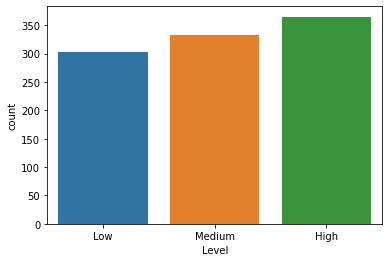

In [15]:
# Check the distribution of the response variable (Lung Cancer Level):
sns.countplot(df_arbaiza['Level'])
plt.show()

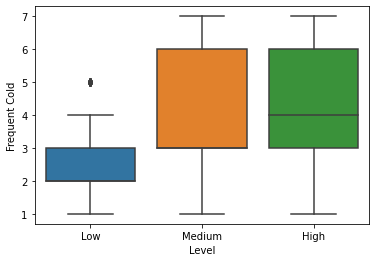

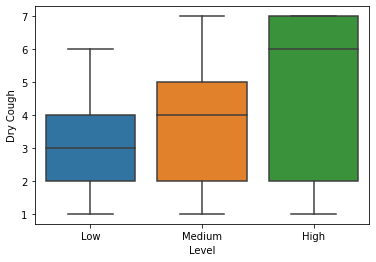

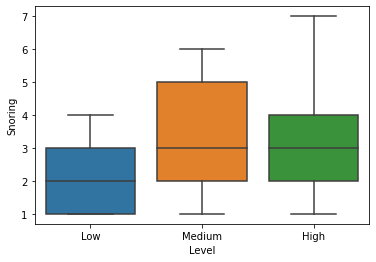

In [17]:
# Plot the distribution of each predictor variable with respect to the response variable:
sns.boxplot(x='Level', y='Frequent Cold', data=df_arbaiza)
plt.show()

sns.boxplot(x='Level', y='Dry Cough', data=df_arbaiza)
plt.show()

sns.boxplot(x='Level', y='Snoring', data=df_arbaiza)
plt.show()

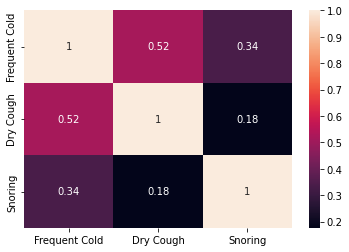

In [18]:
# Create a correlation matrix to check the relationship between the variables:

corr = df_arbaiza.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [21]:
#  Create a score for separation, outliers, symmetry, distribution shape, and distribution spread.


# Spearation:
def separation_score(df, predictor, response):
    """
    Calculates a separation score for a predictor variable with respect to the response variable
    """
    pivot_table = df.pivot_table(index=predictor, columns=response, aggfunc='size')
    pivot_table = pivot_table.div(pivot_table.sum(axis=1), axis=0)
    pivot_table = pivot_table.fillna(0)
    score = pivot_table.diff(axis=1).abs().sum().sum()
    return score

separation_scores = {}
for predictor in ['Frequent Cold', 'Dry Cough', 'Snoring']:
    separation_scores[predictor] = separation_score(df_arbaiza, predictor, 'Level')

print("Separation Scores:")
print(separation_scores)

#  The separation score measures the extent to which the levels of the response 
#  variable are separated for each predictor variable. A higher score indicates 
#  a stronger separation between the levels of the response variable.

Separation Scores:
{'Frequent Cold': 6.376304608487123, 'Dry Cough': 4.51323028359801, 'Snoring': 4.156609093765939}


In [22]:
#  Outliers:

def outlier_score(df, predictor):
    """
    Calculates an outlier score for a predictor variable
    """
    q1, q3 = df[predictor].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[predictor] < lower_bound) | (df[predictor] > upper_bound)]
    score = len(outliers) / len(df)
    return score

outlier_scores = {}
for predictor in ['Frequent Cold', 'Dry Cough', 'Snoring']:
    outlier_scores[predictor] = outlier_score(df_arbaiza, predictor)

print("Outlier Scores:")
print(outlier_scores)

#  The outlier score measures the proportion of observations that are outliers 
#  for each predictor variable. A higher score indicates a higher proportion of outliers, 
#  which may affect the results of the analysis.

Outlier Scores:
{'Frequent Cold': 0.0, 'Dry Cough': 0.0, 'Snoring': 0.0}


In [23]:
#  Symmetry:

def symmetry_score(df, predictor):
    """
    Calculates a symmetry score for a predictor variable
    """
    mean = df[predictor].mean()
    median = df[predictor].median()
    score = abs(mean - median) / (mean + median)
    return score

symmetry_scores = {}
for predictor in ['Frequent Cold', 'Dry Cough', 'Snoring']:
    symmetry_scores[predictor] = symmetry_score(df_arbaiza, predictor)

print("Symmetry Scores:")
print(symmetry_scores)

#  The symmetry score measures the extent to which the mean and median are 
#  different for each predictor variable.  A lower score indicates a more 
#  symmetrical distribution, while a higher score indicates a more skewed 
#  distribution.

Symmetry Scores:
{'Frequent Cold': 0.08200734394124848, 'Dry Cough': 0.01871896090665985, 'Snoring': 0.01248734390820112}


In [24]:
#  Kurtosis:

def kurtosis_score(df, predictor):
    """
    Calculates a kurtosis score for a predictor variable
    """
    kurtosis = df[predictor].kurtosis()
    score = kurtosis / df[predictor].std()**4
    return score

kurtosis_scores = {}
for predictor in ['Frequent Cold', 'Dry Cough', 'Snoring']:
    kurtosis_scores[predictor] = kurtosis_score(df_arbaiza, predictor)

print("Kurtosis Scores:")
print(kurtosis_scores)

#  The kurtosis score measures the extent to which the distribution of each predictor 
#  variable is peaked or flat relative to a normal distribution. A lower score 
#  indicates a more normal distribution, while a higher score indicates a more peaked or 
#  flat distribution.

Kurtosis Scores:
{'Frequent Cold': -0.08359900132756475, 'Dry Cough': -0.0746771705659082, 'Snoring': -0.1165283624701592}


In [32]:
# Run correlation analysis

df_arbaiza['Level'] = df_arbaiza['Level'].map({'Low': 1, 'Medium': 2, 'High': 3})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
# Calculate the correlation matrix
corr = df_arbaiza[['Frequent Cold', 'Dry Cough', 'Snoring', 'Level']].corr()

# Create a table of the correlation strengths
corr_table = corr[['Level']].loc[['Frequent Cold', 'Dry Cough', 'Snoring']]
corr_table = corr_table.rename(columns={'Level': 'Correlation Strength'})

print("Correlation Table:")
print(corr_table)


Correlation Table:
               Correlation Strength
Frequent Cold              0.444017
Dry Cough                  0.373968
Snoring                    0.289366


In [35]:
# Detect outiers in the data

def detect_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
    return outliers

outliers_detected = detect_outliers(df_arbaiza)

outliers_df = pd.DataFrame(outliers_detected.sum(), columns=['Num Outliers'])
outliers_df.sort_values(by='Num Outliers', ascending=False, inplace=True)

print("Outliers detected:")
print(outliers_df)

Outliers detected:
               Num Outliers
Frequent Cold             0
Dry Cough                 0
Snoring                   0
Level                     0
